In [16]:
import glob as glob
import os
from nltools.data import Brain_Data, Design_Matrix
from tqdm.notebook import tqdm

In [66]:
base_dir = '/Volumes/Shaolin/modernmedia_menghan/'
condition = ['Household','MobileDevice','MediaLogo','Food','NeutralLogo']
group_file_list = glob.glob(os.path.join(base_dir,'denoised','smoothed','beta',f'sub*{condition[0]}*.nii.gz'))
len(group_file_list)

35

/Users/menghanyang/anaconda3/envs/py39/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/Users/menghanyang/anaconda3/envs/py39/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/Users/menghanyang/anaconda3/envs/py39/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new imag

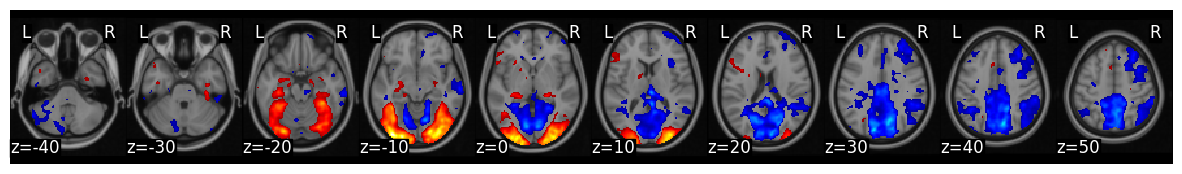

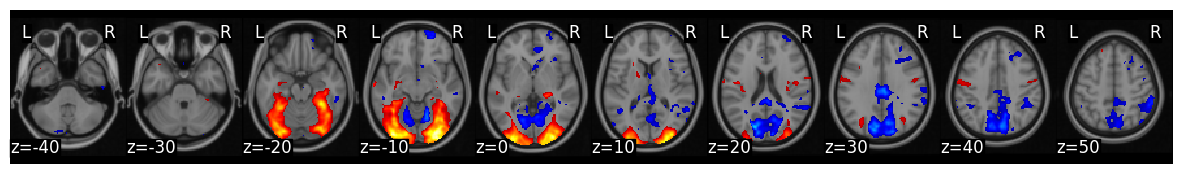

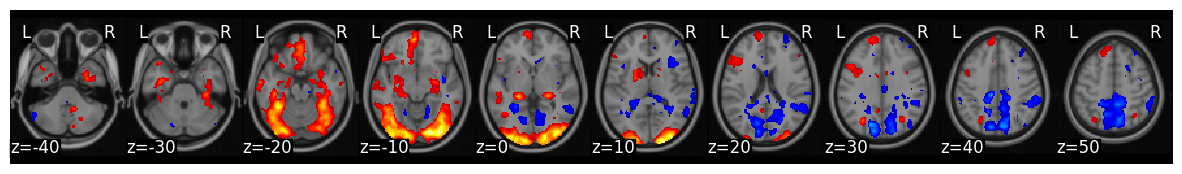

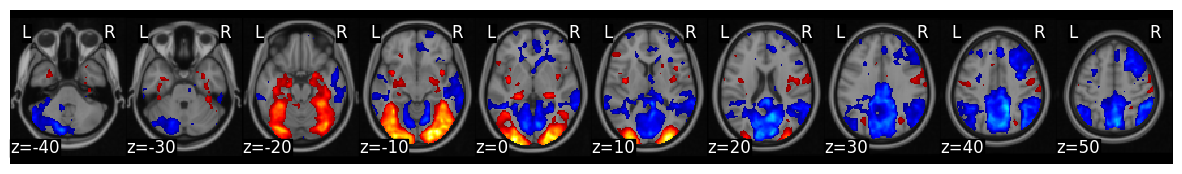

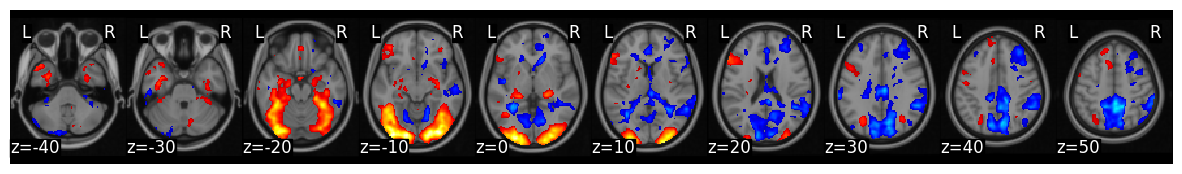

In [67]:
for i in condition:
    group_file_list = glob.glob(os.path.join(base_dir,'denoised','smoothed','beta',f'sub*{i}*.nii.gz'))
    group_dat = Brain_Data(group_file_list)
    group_stats = group_dat.ttest(threshold_dict={'fdr':.05})
    group_stats['thr_t'].plot()

## Contrast

In [68]:
sub_name_all = []
for i in group_file_list:
    a = i.split('/')[-1]
    m = a.split('_')[0]
    sub_name_all.append(m)
len(sub_name_all)

35

#### Media vs neutral

  0%|          | 0/35 [00:00<?, ?it/s]

/Users/menghanyang/anaconda3/envs/py39/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/Users/menghanyang/anaconda3/envs/py39/lib/python3.9/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


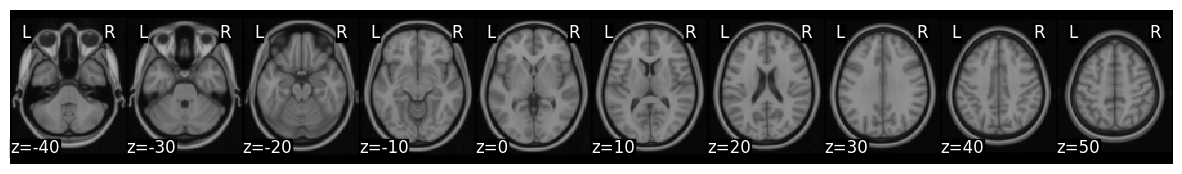

In [71]:
brain_media_contrast = Brain_Data()
for sub in tqdm(range(35)):
    brain_media = Brain_Data(glob.glob(os.path.join(base_dir,'denoised','smoothed','beta',f'{sub_name_all[sub]}*{condition[2]}*.nii.gz')))
    brain_neutral = Brain_Data(glob.glob(os.path.join(base_dir,'denoised','smoothed','beta',f'{sub_name_all[sub]}*{condition[4]}*.nii.gz')))
    brain_media_contrast = brain_media_contrast.append(brain_media-brain_neutral)

brain_media_contrast_stats = brain_media_contrast.ttest(threshold_dict={'fdr':.05})
# brain_media_contrast_stats = brain_media_contrast.ttest(threshold_dict={'unc':.005})
brain_media_contrast_stats['thr_t'].plot()

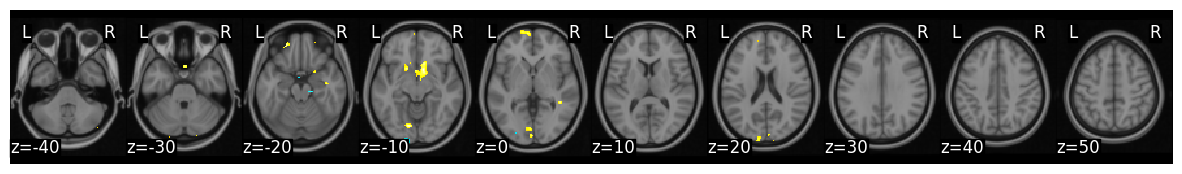

In [72]:
brain_media_contrast.ttest(threshold_dict={'unc':0.005})['thr_t'].plot()

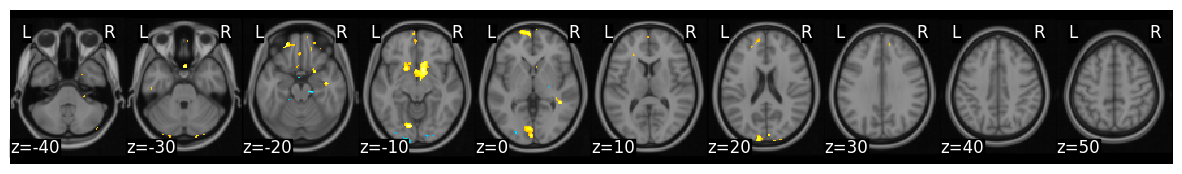

In [73]:
brain_media_contrast.ttest(threshold_dict={'unc':0.01})['thr_t'].plot()

#### MobileDevice vs neutral¶

  0%|          | 0/35 [00:00<?, ?it/s]

/Users/menghanyang/anaconda3/envs/py39/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


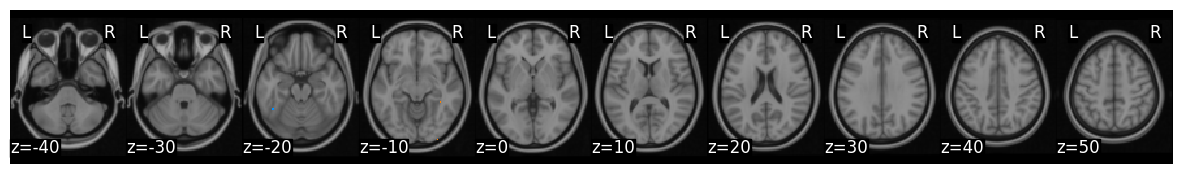

In [74]:
brain_mobile_contrast = Brain_Data()
for sub in tqdm(range(35)):
    brain_mobile = Brain_Data(glob.glob(os.path.join(base_dir,'denoised','smoothed','beta',f'{sub_name_all[sub]}*{condition[1]}*.nii.gz')))
    brain_neutral = Brain_Data(glob.glob(os.path.join(base_dir,'denoised','smoothed','beta',f'{sub_name_all[sub]}*{condition[4]}*.nii.gz')))
    brain_mobile_contrast = brain_mobile_contrast.append(brain_mobile-brain_neutral)

brain_mobile_contrast_stats = brain_mobile_contrast.ttest(threshold_dict={'fdr':.05})
# brain_mobile_contrast_stats = brain_mobile_contrast.ttest(threshold_dict={'unc':.005})
brain_mobile_contrast_stats['thr_t'].plot()

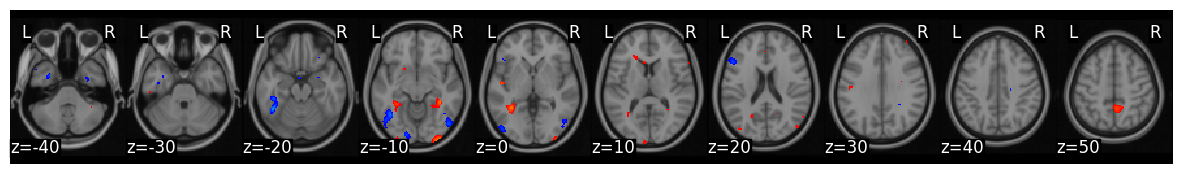

In [75]:
brain_mobile_contrast.ttest(threshold_dict={'unc':0.005})['thr_t'].plot()

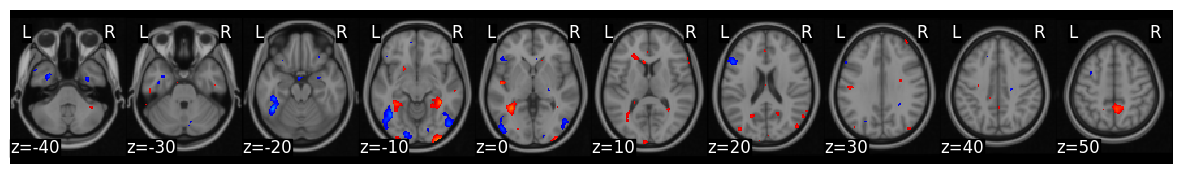

In [76]:
brain_mobile_contrast.ttest(threshold_dict={'unc':0.01})['thr_t'].plot()

#### Media vs MobileDevice¶

  0%|          | 0/35 [00:00<?, ?it/s]

/Users/menghanyang/anaconda3/envs/py39/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


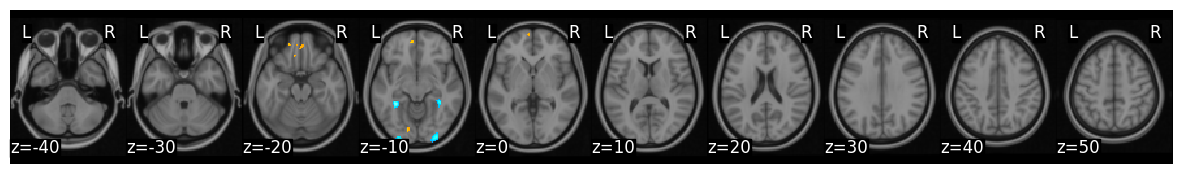

In [77]:
brain_media_mobile_contrast = Brain_Data()
for sub in tqdm(range(35)):
    brain_mobile = Brain_Data(glob.glob(os.path.join(base_dir,'denoised','smoothed','beta',f'{sub_name_all[sub]}*{condition[1]}*.nii.gz')))
    brain_media = Brain_Data(glob.glob(os.path.join(base_dir,'denoised','smoothed','beta',f'{sub_name_all[sub]}*{condition[2]}*.nii.gz')))
    brain_media_mobile_contrast = brain_media_mobile_contrast.append(brain_media - brain_mobile)

brain_media_mobile_contrast.ttest(threshold_dict={'fdr':.05})['thr_t'].plot()

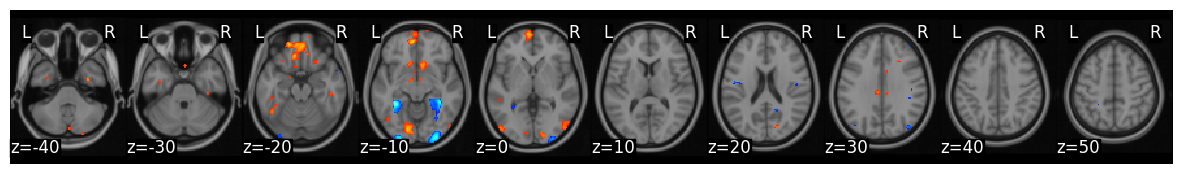

In [78]:
brain_media_mobile_contrast.ttest(threshold_dict={'unc':0.005})['thr_t'].plot()